<div style="color:white;display:fill;border-radius:8px;
            background-color:#03112A;font-size:150%;
            letter-spacing:1.0px">
    <p style="padding: 8px;color:white;"><b><b><span style='color:#FFFFFF'></span></b> 1. Importing Required Libraries </b></p>
</div>

In [ ]:
import pandas as pd
import numpy as np
import plotly.io as pio
pio.renderers.default = "browser" 
import seaborn as sns
import matplotlib.pyplot as plt
plt.ioff()
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score
import scipy.stats as stats
from sklearn.utils import resample

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import VotingClassifier


<div style="color:white;display:fill;border-radius:8px;
            background-color:#03112A;font-size:150%;
            letter-spacing:1.0px">
    <p style="padding: 8px;color:white;"><b><b><span style='color:#FFFFFF'></span></b> 2. Data Preprocessing-1 </b></p>
</div>

In [4]:
train = pd.read_csv("TrainData.csv")
test = pd.read_csv("TestData.csv")

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [8]:
def drop_ID(x):
    x.drop(columns=["Loan_ID"],inplace=True)
drop_ID(train)
drop_ID(test)

In [9]:
def check_missing(x):
    print(x.isnull().sum()/len(x)*100)
    print(" ")

In [ ]:
check_missing(train)
check_missing(test)

Gender               2.117264
Married              0.488599
Dependents           2.442997
Education            0.000000
Self_Employed        5.211726
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           3.583062
Loan_Amount_Term     2.280130
Credit_History       8.143322
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64
 
Gender               2.997275
Married              0.000000
Dependents           2.724796
Education            0.000000
Self_Employed        6.267030
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           1.362398
Loan_Amount_Term     1.634877
Credit_History       7.901907
Property_Area        0.000000
dtype: float64
 


In [11]:
def fill_missing(x):
    x["Credit_History"].fillna(0,inplace=True)
    x["Self_Employed"].fillna("No",inplace=True)
    x["LoanAmount"].fillna(x["LoanAmount"].mean(),inplace=True)
    x["Loan_Amount_Term"].fillna(0,inplace=True)
    x["Gender"].fillna('Other',inplace=True)
    x["Married"].fillna('No',inplace=True)
    x["Dependents"].fillna("Other",inplace=True)
    
fill_missing(train)
fill_missing(test)

check_missing(train)
check_missing(test)

Gender               0.0
Married              0.0
Dependents           0.0
Education            0.0
Self_Employed        0.0
ApplicantIncome      0.0
CoapplicantIncome    0.0
LoanAmount           0.0
Loan_Amount_Term     0.0
Credit_History       0.0
Property_Area        0.0
Loan_Status          0.0
dtype: float64
 
Gender               0.0
Married              0.0
Dependents           0.0
Education            0.0
Self_Employed        0.0
ApplicantIncome      0.0
CoapplicantIncome    0.0
LoanAmount           0.0
Loan_Amount_Term     0.0
Credit_History       0.0
Property_Area        0.0
dtype: float64
 


<div style="color:white;display:fill;border-radius:8px;
            background-color:#03112A;font-size:150%;
            letter-spacing:1.0px">
    <p style="padding: 8px;color:white;"><b><b><span style='color:#FFFFFF'></span></b> 2. Data Preprocessing-2 </b></p>
</div>

In [12]:
label_encoder = preprocessing.LabelEncoder()

In [14]:
def uq_vals(x):
    cat_columns = ['Gender','Married','Dependents','Education','Self_Employed','Property_Area','Credit_History']
    for column in cat_columns:
        print(column," : ",x[column].unique())
        
uq_vals(train)
print("Loan_Status"," : ",train["Loan_Status"].unique())
print(" ")
uq_vals(test)

Gender  :  ['Male' 'Female' 'Other']
Married  :  ['No' 'Yes']
Dependents  :  ['0' '1' '2' '3+' 'Other']
Education  :  ['Graduate' 'Not Graduate']
Self_Employed  :  ['No' 'Yes']
Property_Area  :  ['Urban' 'Rural' 'Semiurban']
Credit_History  :  [1. 0.]
Loan_Status  :  ['Y' 'N']
 
Gender  :  ['Male' 'Female' 'Other']
Married  :  ['Yes' 'No']
Dependents  :  ['0' '1' '2' '3+' 'Other']
Education  :  ['Graduate' 'Not Graduate']
Self_Employed  :  ['No' 'Yes']
Property_Area  :  ['Urban' 'Semiurban' 'Rural']
Credit_History  :  [1. 0.]


In [15]:
def enc(x):
    cat_columns = ['Gender','Married','Dependents','Education','Self_Employed','Property_Area','Credit_History']
    for column in cat_columns :
        x[column] = label_encoder.fit_transform(x[column])

train["Loan_Status"] = label_encoder.fit_transform(train["Loan_Status"])


enc(train)
enc(test)

uq_vals(train)
print("Loan_Status"," : ",train["Loan_Status"].unique())
print(" ")
uq_vals(test)

Gender  :  [1 0 2]
Married  :  [0 1]
Dependents  :  [0 1 2 3 4]
Education  :  [0 1]
Self_Employed  :  [0 1]
Property_Area  :  [2 0 1]
Credit_History  :  [1 0]
Loan_Status  :  [1 0]
 
Gender  :  [1 0 2]
Married  :  [1 0]
Dependents  :  [0 1 2 3 4]
Education  :  [0 1]
Self_Employed  :  [0 1]
Property_Area  :  [2 1 0]
Credit_History  :  [1 0]


<div style="color:white;display:fill;border-radius:8px;
            background-color:#03112A;font-size:150%;
            letter-spacing:1.0px">
    <p style="padding: 8px;color:white;"><b><b><span style='color:#FFFFFF'></span></b> 3. Outlier Detection and Removal </b></p>
</div>

In [19]:
import plotly.express as px
import plotly.io as pio

def plot_outliers(x):
    numeric_cols = x.select_dtypes(include=['number'])
    fig = px.box(numeric_cols, title="Boxplots for Numeric Columns (Outlier Detection)")
    pio.renderers.default = "browser"  # Optional for non-Jupyter environments
    fig.show()

plot_outliers(train)


In [21]:
numeric_cols = train.select_dtypes(include=['number'])
z = np.abs(stats.zscore(train))
train = train[(z < 3).all(axis=1)]
plot_outliers(train)

<div style="color:white;display:fill;border-radius:8px;
            background-color:#03112A;font-size:150%;
            letter-spacing:1.0px">
    <p style="padding: 8px;color:white;"><b><b><span style='color:#FFFFFF'></span></b> 4. Balanced Class Data </b></p>
</div>

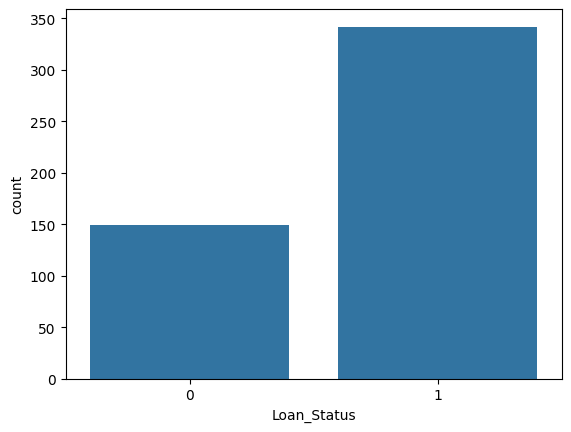

In [25]:
import seaborn as sns
sns.countplot(data=train, x='Loan_Status')
plt.show()


In [26]:
df_majority = train[(train['Loan_Status'] == 1)]
df_minority = train[(train['Loan_Status'] == 0)]

df_minority_upsampled = resample(df_minority, replace=True, n_samples=398, random_state=0)
train = pd.concat([df_minority_upsampled, df_majority])

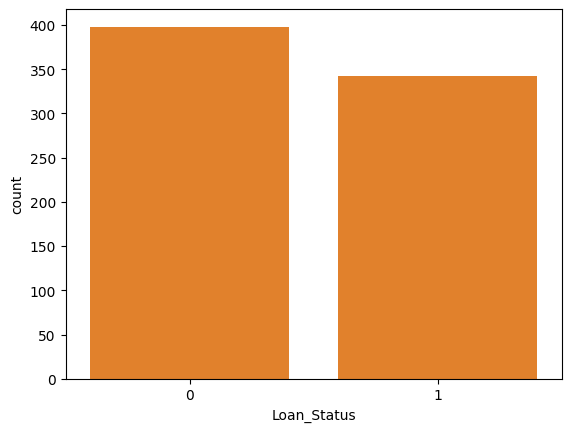

In [28]:
import seaborn as sns
sns.countplot(data=train, x='Loan_Status')
plt.show()


<div style="color:white;display:fill;border-radius:8px;
            background-color:#03112A;font-size:150%;
            letter-spacing:1.0px">
    <p style="padding: 8px;color:white;"><b><b><span style='color:#FFFFFF'></span></b> 5. Test Train Split </b></p>
</div>

In [30]:
X = train.drop('Loan_Status', axis=1)
y = train['Loan_Status']

In [31]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.03,random_state=0)

In [32]:
print("X_train : ",X_train.shape)
print("X_test : ",X_test.shape)
print("y_train : ",y_train.shape)
print("y_test : ",y_test.shape)

X_train :  (717, 11)
X_test :  (23, 11)
y_train :  (717,)
y_test :  (23,)


<div style="color:white;display:fill;border-radius:8px;
            background-color:#03112A;font-size:150%;
            letter-spacing:1.0px">
    <p style="padding: 8px;color:white;"><b><b><span style='color:#FFFFFF'></span></b> 6. Building Models </b></p>
</div>

In [33]:
classifiers = {
    'Decision Tree': DecisionTreeClassifier(random_state=0),
    'Random Forest': RandomForestClassifier(random_state=2),
    'Logistic Regression': LogisticRegression(random_state=42,solver='liblinear'),
    'KNN': KNeighborsClassifier(n_neighbors=3)
}

for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = round(accuracy_score(y_test, y_pred) * 100, 2)
    print(f"{name} Accuracy: {accuracy}%")

Decision Tree Accuracy: 86.96%
Random Forest Accuracy: 91.3%
Logistic Regression Accuracy: 65.22%
KNN Accuracy: 82.61%


In [34]:
# param_grid = {
#    'bootstrap': [False,True],
#    'max_depth': [5,8,10, 20],
#    'max_features': [3, 4, 5, None],
#    'min_samples_split': [2, 10, 12],
#    'n_estimators': [100, 200, 300]
# }
# rfc = RandomForestClassifier(random_state=2) 
# clf = GridSearchCV(estimator = rfc, param_grid = param_grid, cv = 5, n_jobs = -1, verbose = 1)

# clf.fit(X_train,y_train)
# y_pred = clf.predict(X_test)
# print("Accuracy: ",accuracy_score(y_test,y_pred))
# print(clf.best_params_)
# print(clf.best_estimator_)

# # Output:
# # Fitting 5 folds for each of 288 candidates, totalling 1440 fits
# # Accuracy:  0.8679245283018868
# # {'bootstrap': True, 'max_depth': 10, 'max_features': 5, 'min_samples_split': 2, 'n_estimators': 300}
# # RandomForestClassifier(max_depth=10, max_features=5, n_estimators=300,
# #                        random_state=2)

In [35]:
dtree = DecisionTreeClassifier(random_state=0)
rfc = RandomForestClassifier(random_state=2)
lr = LogisticRegression(random_state=42,solver='liblinear')
knn = KNeighborsClassifier(n_neighbors=3)

<div style="color:white;display:fill;border-radius:8px;
            background-color:#03112A;font-size:150%;
            letter-spacing:1.0px">
    <p style="padding: 8px;color:white;"><b><b><span style='color:#FFFFFF'></span></b> 7. Building a Ensemble Voting Classifier </b></p>
</div>

In [36]:
dtree.fit(X_train,y_train)
rfc.fit(X_train,y_train)
lr.fit(X_train,y_train)
#knn.fit(X_train,y_train)

LogisticRegression(random_state=42, solver='liblinear')

In [37]:
ens1 = VotingClassifier(estimators=[('rfc', rfc), ('lr', lr), ('dtree',dtree)], voting='soft')
ens1.fit(X_train, y_train)

y_pred = ens1.predict(X_test)
print("Accuracy :",round(accuracy_score(y_test,y_pred)*100,2),"%")

Accuracy : 86.96 %


In [38]:
ens2 = VotingClassifier(estimators=[('rfc', rfc), ('lr', lr), ('dtree',dtree)], voting='hard')
ens2.fit(X_train, y_train)

y_pred = ens2.predict(X_test)
print("Accuracy :",round(accuracy_score(y_test,y_pred)*100,2),"%")

Accuracy : 91.3 %


<div style="color:white;display:fill;border-radius:8px;
            background-color:#03112A;font-size:150%;
            letter-spacing:1.0px">
    <p style="padding: 8px;color:white;"><b><b><span style='color:#FFFFFF'></span></b> 8. Predicting Test Data </b></p>
</div>

In [39]:
prediction = ens2.predict(test)
prediction = pd.DataFrame(data=prediction)
prediction.head()

,0
0,1
1,1
2,1
3,0
4,0


In [40]:
result = pd.DataFrame(data=pd.read_csv("TestData.csv")["Loan_ID"])
result["Loan_Status"] = prediction
result.head()

,Loan_ID,Loan_Status
0,LP001015,1
1,LP001022,1
2,LP001031,1
3,LP001035,0
4,LP001051,0


In [41]:
result["Loan_Status"] = result["Loan_Status"].astype(str).str.replace("0","N")
result["Loan_Status"] = result["Loan_Status"].astype(str).str.replace("1","Y")
result.head()

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,N
4,LP001051,N


In [42]:
result = result.set_index(['Loan_ID'])
result.head()

,Loan_Status
Loan_ID,
LP001015,Y
LP001022,Y
LP001031,Y
LP001035,N
LP001051,N


In [45]:
result.to_csv("Results_of_Test.csv")

<div style="color:white;display:fill;border-radius:8px;
            background-color:#03112A;font-size:150%;
            letter-spacing:1.0px">
    <p style="padding: 8px;color:white;"><b><b><span style='color:#FFFFFF'></span></b> 9. Exporting The Model </b></p>
</div>

In [14]:
import streamlit as st
import joblib

In [15]:
import joblib

# Assuming 'rf_classifier' is the model you want to save
joblib.dump(rf_classifier, 'model.joblib')



['model.joblib']